In [189]:
# Dependencies
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import tweepy 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [4]:
#Set Up Search Terms
Search_Terms = ['@BBCNews', '@CBSNews','@CNN', '@FoxNews', '@nytimes']
Tweets_List = []
Full_Text = []
Tweet_Id = []
Created_At = []
News_Organization = []

In [5]:
for account in Search_Terms:
    for tweet in tweepy.Cursor(api.user_timeline, account, tweet_mode='extended').items(100):
        Tweets_List.append(tweet)
        News_Organization.append(account)

In [6]:
Tweets_List

[Status(_api=<tweepy.api.API object at 0x0000025CB4A63B88>, _json={'created_at': 'Wed May 20 17:07:03 +0000 2020', 'id': 1263154279189282816, 'id_str': '1263154279189282816', 'full_text': 'People across UK head to beaches and parks for hottest day of year so far https://t.co/3wHxgiw3wH', 'truncated': False, 'display_text_range': [0, 97], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/3wHxgiw3wH', 'expanded_url': 'https://bbc.in/36kJwdM', 'display_url': 'bbc.in/36kJwdM', 'indices': [74, 97]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 612473, 'id_str': '612473', 'name': 'BBC News (UK)', 'screen_name': 'BBCNews', 'location': 'London', 'description': 'News, features and analysis. For world news, follow @BBCWorld. Breaking news, fo

In [9]:
for Tweets in Tweets_List:
    Tweet_Id.append(Tweets.id)
    Created_At.append(Tweets.created_at)
    Full_Text.append(Tweets.full_text)

In [102]:
Tweets_DF = pd.DataFrame({
    'News_Organization': News_Organization,
    'Tweet ID': Tweet_Id,
    'Tweet Creation': Created_At,
    'Tweet': Full_Text
    })

In [103]:
Tweets_DF

News_Organization             Tweet ID      Tweet Creation  \
0            @BBCNews  1263154279189282816 2020-05-20 17:07:03   
1            @BBCNews  1263152724713050113 2020-05-20 17:00:52   
2            @BBCNews  1263152723228274689 2020-05-20 17:00:52   
3            @BBCNews  1263152721684828160 2020-05-20 17:00:51   
4            @BBCNews  1263152720174866433 2020-05-20 17:00:51   
..                ...                  ...                 ...   
495          @nytimes  1262868157984911364 2020-05-19 22:10:06   
496          @nytimes  1262865659786117126 2020-05-19 22:00:10   
497          @nytimes  1262861127576363012 2020-05-19 21:42:10   
498          @nytimes  1262860596409589760 2020-05-19 21:40:03   
499          @nytimes  1262855563664412677 2020-05-19 21:20:03   

                                                 Tweet  
0    People across UK head to beaches and parks for...  
1    As the lockdown is eased, the aim is to keep R...  
2    There are regional differences to R\n\nLondon ...  
3    The data used means the R figure generally giv...  
4    If the reproduction number is higher than 1, t...  
..                                                 ...  
495  RT @nytimesarts: With schools closed, graduati...  
496  The leaders of the psych-rock group Woods help...  
497  RT @sona: News around California's public heal...  
498  In a bid to soften the coronavirus’s economic ...  
499  The U.S. economy faces irreparable damage from...  

[500 rows x 4 columns]

In [256]:
SentimentResults = []

In [257]:
for t in Full_Text:
    Sentiment_Results = analyzer.polarity_scores(t)
    SentimentResults.append(Sentiment_Results)

In [259]:
Sentiment_Analysis = pd.DataFrame(SentimentResults)


In [260]:
SentimentResults = Sentiment_Analysis['compound']

In [264]:
Final_Tweets_DF = pd.DataFrame({
      'News_Organization': News_Organization,
      'Tweet ID': Tweet_Id,
      'Tweet Creation': Created_At,
      'Tweet': Full_Text,
      'Sentiment': SentimentResults,
})

In [265]:
Final_Tweets_DF.sort_values('Tweet Creation', ascending=False)

News_Organization             Tweet ID      Tweet Creation  \
400          @nytimes  1263167630313209856 2020-05-20 18:00:06   
200              @CNN  1263167617294008324 2020-05-20 18:00:03   
100          @CBSNews  1263167609207472128 2020-05-20 18:00:01   
201              @CNN  1263165347919810561 2020-05-20 17:51:02   
101          @CBSNews  1263163797562417153 2020-05-20 17:44:52   
..                ...                  ...                 ...   
395          @FoxNews  1259960098681688070 2020-05-11 21:34:31   
396          @FoxNews  1259942674859274240 2020-05-11 20:25:16   
397          @FoxNews  1259661340358201344 2020-05-11 01:47:21   
398          @FoxNews  1259645875720257536 2020-05-11 00:45:54   
399          @FoxNews  1259627547375083520 2020-05-10 23:33:04   

                                                 Tweet  Sentiment  
400  As businesses start to reopen, Americans expec...     0.0000  
200  CDC sources say the White House is putting pol...    -0.4588  
100  Border wall construction firm favored by Trump...     0.4215  
201  Thousands evacuate after dams fail, and Michig...    -0.5994  
101  New Zealand PM Jacinda Ardern says four-day wo...     0.4019  
..                                                 ...        ...  
395                            https://t.co/E0XAqsYJ0n     0.0000  
396                            https://t.co/ZvmRx0byXy     0.0000  
397                            https://t.co/ad619wikI4     0.0000  
398                            https://t.co/YBI6JyAWfy     0.0000  
399                            https://t.co/In1tssRa1F     0.0000  

[500 rows x 5 columns]

In [279]:
Range_Index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
              31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
              61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,
              91,92,93,94,95,96,97,98,99,100]
RangeIndex = []

In [280]:
for Range in Range_Index:
    Tweet_Range = Range - 1
    RangeIndex.append(Tweet_Range)

In [281]:
Final_Tweets_DF.sort_values('News_Organization')

News_Organization             Tweet ID      Tweet Creation  \
0            @BBCNews  1263154279189282816 2020-05-20 17:07:03   
72           @BBCNews  1262949432926101504 2020-05-20 03:33:03   
71           @BBCNews  1262954691232702465 2020-05-20 03:53:57   
70           @BBCNews  1262957950882254848 2020-05-20 04:06:54   
69           @BBCNews  1262972688911523840 2020-05-20 05:05:28   
..                ...                  ...                 ...   
427          @nytimes  1263111008773603328 2020-05-20 14:15:06   
426          @nytimes  1263112255786319873 2020-05-20 14:20:03   
425          @nytimes  1263114803159105536 2020-05-20 14:30:11   
435          @nytimes  1263092148863467521 2020-05-20 13:00:10   
499          @nytimes  1262855563664412677 2020-05-19 21:20:03   

                                                 Tweet  Sentiment  
0    People across UK head to beaches and parks for...     0.0000  
72   Coronavirus: Diabetic people offered support h...     0.4019  
71   RT @BBCIndia: "Nobody helped us. My cousin did...    -0.1096  
70   Coronavirus: Ministers under pressure over sch...    -0.2960  
69   Coronavirus: Serco apologises for sharing cont...     0.5574  
..                                                 ...        ...  
427  RT @AJNierenberg: Are you buying plant-based m...     0.0000  
426  Some people who survived the coronavirus said ...     0.0335  
425  RT @sarahlyall: Reading "The Hunger Games" tri...    -0.3818  
435  Afghanistan's conflict is back into full-fledg...     0.5267  
499  The U.S. economy faces irreparable damage from...    -0.8360  

[500 rows x 5 columns]

In [276]:
Final_Tweets_DF.to_csv(r"Output/Tweet_Sentiment_Analysis.csv", index=True)

In [282]:
Final_Tweets_DF['Tweets Ago'] = RangeIndex * 5
Final_Tweets_DF.head(10)

News_Organization             Tweet ID      Tweet Creation  \
0          @BBCNews  1263154279189282816 2020-05-20 17:07:03   
1          @BBCNews  1263152724713050113 2020-05-20 17:00:52   
2          @BBCNews  1263152723228274689 2020-05-20 17:00:52   
3          @BBCNews  1263152721684828160 2020-05-20 17:00:51   
4          @BBCNews  1263152720174866433 2020-05-20 17:00:51   
5          @BBCNews  1263152718249709569 2020-05-20 17:00:50   
6          @BBCNews  1263152717020700672 2020-05-20 17:00:50   
7          @BBCNews  1263150321326534656 2020-05-20 16:51:19   
8          @BBCNews  1263148386867458050 2020-05-20 16:43:38   
9          @BBCNews  1263146385643393025 2020-05-20 16:35:41   

                                               Tweet  Sentiment  Tweets Ago  
0  People across UK head to beaches and parks for...     0.0000           0  
1  As the lockdown is eased, the aim is to keep R...     0.8481           1  
2  There are regional differences to R\n\nLondon ...     0.4588           2  
3  The data used means the R figure generally giv...     0.0000           3  
4  If the reproduction number is higher than 1, t...    -0.5423           4  
5  The R, or reproduction number, is a way of rat...    -0.0772           5  
6  There is a simple, but crucial number at the h...    -0.2617           6  
7  "I'd love to get the tourism sector up as quic...     0.7003           7  
8  "The clear intention is that we move as a whol...    -0.1803           8  
9  Why doesn't the government acknowledge "honest...     0.0772           9

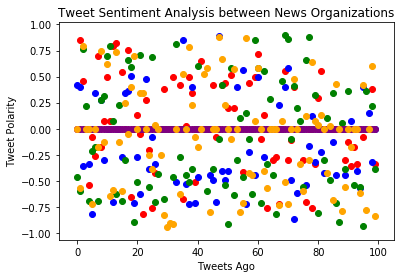

In [285]:
#Scatter Plot by Recency of Tweet
x_axis = Final_Tweets_DF['Tweets Ago'][:100]
BBC = Final_Tweets_DF['Sentiment'][:100]
CBS = Final_Tweets_DF['Sentiment'][100:200]
CNN = Final_Tweets_DF['Sentiment'][200:300]
Fox = Final_Tweets_DF['Sentiment'][300:400]
NewYorkTimes = Final_Tweets_DF['Sentiment'][400:500]
plt.scatter(x_axis, BBC, marker='o', c='red')
plt.scatter(x_axis, CBS, marker='o', c='blue')
plt.scatter(x_axis, CNN, marker='o', c='green')
plt.scatter(x_axis, Fox, marker='o', c='purple')
plt.scatter(x_axis, NewYorkTimes, marker='o', c='orange')
plt.title('Tweet Sentiment Analysis between News Organizations')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.savefig('Output/Tweet Sentiment Analysis between News Organizations.png')

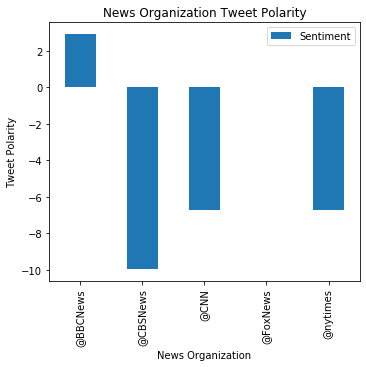

In [286]:
#Bar Plot of Overall Sentiment
Overall_Sentiment = Final_Tweets_DF.groupby(['News_Organization']).sum()
Overall_Sentiment = pd.DataFrame(Overall_Sentiment['Sentiment'])
Overall_Sentiment.plot(kind="bar", figsize=(5,5))
plt.tight_layout()
plt.xlabel('News Organization')
plt.ylabel('Tweet Polarity')
plt.title("News Organization Tweet Polarity")
plt.savefig('Output/News Organization Tweet Polarity.png')

In [288]:
Mean_Tweet_Analysis = Final_Tweets_DF.groupby(['News_Organization']).mean()
Mean_Tweet_Analysis

Tweet ID  Sentiment  Tweets Ago
News_Organization                                     
@BBCNews           1.263018e+18   0.029216        49.5
@CBSNews           1.263032e+18  -0.099829        49.5
@CNN               1.263034e+18  -0.067178        49.5
@FoxNews           1.261616e+18   0.000000        49.5
@nytimes           1.263029e+18  -0.067407        49.5